In [1]:
import pandas as pd

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

In [3]:
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')
dataframe = pd.read_csv(r"Base de Datos/Hoja de cálculo UPZ y localidaes.csv", sep = ';')
dataframe.head()

,�,Sin estrato *,1. Bajo - bajo,2. Bajo,3. Medio - bajo,4. Medio,5. Medio - Alto,6. Alto,Latitud,Longitud,...,Estrato 3 a�o 2018,Estrato 4 A�o 2018,Estrato 5 a�o 2018,Estrato 6 A�o 2018,Paquetes por UPZ,Precio promedio por m� por UPZ,Paquetes/Precio,Puntaje paqueteria,Puntaje precio,Puntaje total
0,1 Paseo de los Libertadores,198.0,10.000,2.587,0.000,0.000,0.000,702.0,4.796,-74.034,...,0,0,0,504,13283,2775093,"0,0047865",0,13,7
1,2 La Academia,221.0,0.000,8.000,0.000,0.000,334.000,310.0,4.786,-74.049,...,0,0,197,183,4867,5211913,"0,0009339",0,6,3
2,3 Guaymaral,14.0,0.000,0.000,0.000,2.000,0.000,152.0,4.814,-74.066,...,0,24,0,1835,27837,7369048,"0,0037775",1,1,1
3,9 Verbenal,78.0,5.319,21.935,62.885,3.854,5.288,0.0,4.765,-74.038,...,71191,4363,5986,0,522606,2099151,"0,2489608",10,15,13
4,10 La Uribe,135.0,7.000,543.000,12.136,4.566,0.000,0.0,4.752,-74.045,...,21509,8092,0,0,159236,2501438,"0,0636578",3,14,9


In [4]:
Seleccion = int(input("Señor usuario, porfavor ingrese el numero 1 si desea escoger los centros de envío solo teniendo en cuenta la cantidad de paquetes de la zona, 2 para tener en cueta solo el precio de arrendamiento de la zona y 3 si quiere tener en cuenta ambos factores: "))
if(Seleccion == 1):
    dataframe2 = dataframe[['Latitud',"Longitud","Puntaje paqueteria"]].to_numpy()
elif(Seleccion == 2):
    dataframe2 = dataframe[['Latitud',"Longitud","Puntaje precio"]].to_numpy()
elif(Seleccion == 3):
    dataframe2 = dataframe[['Latitud',"Longitud","Puntaje total"]].to_numpy()

Señor usuario, porfavor ingrese el numero 1 si desea escoger los centros de envío solo teniendo en cuenta la cantidad de paquetes de la zona, 2 para tener en cueta solo el precio de arrendamiento de la zona y 3 si quiere tener en cuenta ambos factores: 3


In [5]:
matriz = []
for i in range(112):
    fugaz = [0.0,0.0]
    for j in range(3):
        if(j == 2):
            for b in range(int(dataframe2[i][j])):
                matriz.append(fugaz)
        else:
            fugaz[j] = float(dataframe2[i][j])

In [6]:
numero_clusters = int(input("ingrese el numero de clusters: "))
kmeans = KMeans(n_clusters = numero_clusters, random_state = 0).fit(matriz)
kmeans.labels_
kmeans.cluster_centers_
centros = kmeans.cluster_centers_

ingrese el numero de clusters: 8


In [7]:
matriz1=[]
for i in range(len(matriz)):
    matriz1.append(matriz[i][0])

matriz2=[]
for i in range(len(matriz)):
    matriz2.append(matriz[i][1])
    
centros1=[]
for i in range(len(centros)):
    centros1.append(centros[i][0])

centros2=[]
for i in range(len(centros)):
    centros2.append(centros[i][1])

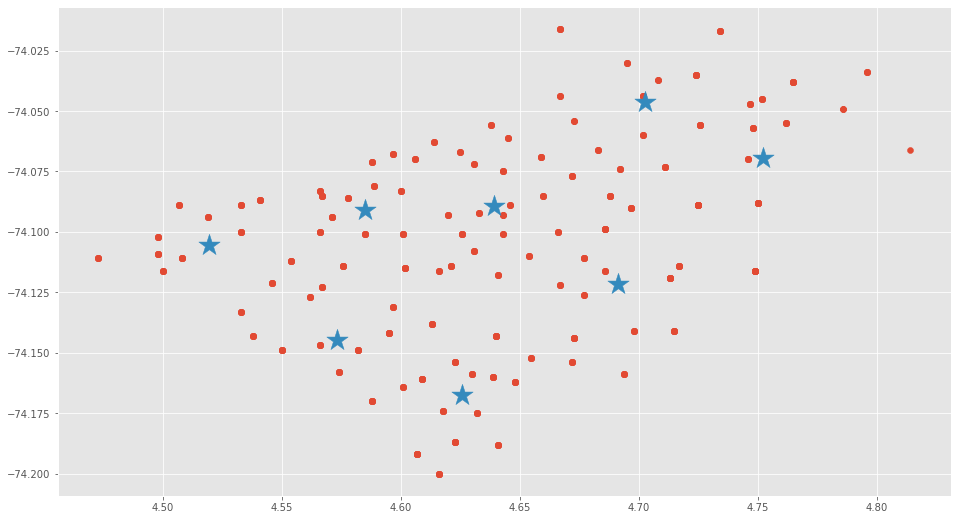

In [8]:
fig = plt.figure()
fig1 = plt.scatter(matriz1,matriz2)
fig2 = plt.scatter(centros1,centros2,marker = '*', s = 500)